### Generative Adversarial Nets, Goodfellow et al.
- **Estimating generative models via adverserial process**
- **'Generative Model',  'Adverserial Process'**

### Prerequisites
- **Semi-Supervised Learning**
    - Self Training method
        - Train with Labeled data
        - Predict Unlabeled data
        - Highest confidence predictions are used for repetitive training(Pseudo-labeling)
        - Repeat steps
        
- **Generative Models**
    - Classification problem : Discriminative vs. Generative
        - for given $v\text{(parameters)}, h\text{(observations)}$, ...
        - Discriminative model directly models $p(h|v)$
        - Generative model models $p(v,h) = p(v|h)p(h)$ : look for joint pdf
    - Undirected model(Energy-based models, for braind dynamics)
    
    - Discriminative Model : focus of 'class differences'
    - Generative Model : focus on 'class distribution'
    ---
    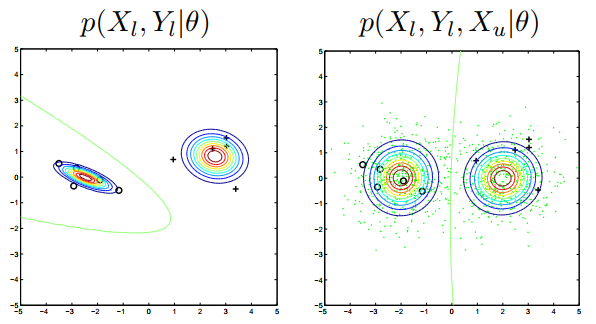
    - Why two gaussian models look different?
    - Left : Only labeled data are used for distribution estimation.
    - Right : Unlabeled data are also used for distribution estimation.
    ---
- **Generative model for semi-supervised learning**
    - We want to estimate distribution with both labeled and unlabeled datas.
    - $p(X_l, y_l, X_u | \theta) = \sum_{y_u}{p(X_l,y_l,X_u,y_u|\theta)}$ : MLE approach for $\theta$ estimation
    - By learning *'distribution of training data'*, we can generate similar datas with training data.
    - $\text{learn }p_{model}(x) \text{ similar to } p_{data}(x)$

### GAN
**Objective function of GAN** <br/>
- $\min_G \max_D V(D,G) = \mathbb E_{x\sim p_{data}(x)}[\log D(x)] + \mathbb E_{z \sim p_z(z)}[\log (1-D(G(z)))] \\ $

**Minimax problem of GAN** <br/>
- To show that GAN is working well, we have to show that
    - The minimax problem of GAN has a global optimum at $p_g = p_{data}$
    - The proposed algorithm can find that global optimum, and converges well.

**Fix Generator $\mathcal G$ and find optimal Discriminator $\mathcal D$**

- $\text{Sampling } x \text{ from } p_g \text{ instead of sampling } z \text{  from } p_z \text{ to convert into function of x leads to following equation.}$
- $D^*(x) = argmax_D V(D) = \mathbb E_{x\sim p_{data}(x)}[\log D(x)] + \mathbb E_{z \sim p_z(z)}[\log (1-D(G(z)))]  = \mathbb E_{x \sim p_{data}(x)} [\log D(x)] + \mathbb E_{x \sim p_g(x)}[\log(1-D(x))] \\ $ 
- $R.H.S = \mathbb E_{x \sim p_{data}(x)} [\log D(x)] + \mathbb E_{x \sim p_g(x)}[\log(1-D(x))] =$  <br/>
$ \int_x{p_{data}(x) \log D(x) dx} + \int _x {p_g(x) \log(1-D(x))}dx = \int_x{p_{data}(x) \log D(x) + p_g(x) \log(1-D(x))dx}$ $\text{ : Definition of expectation}$ <br/><br/>
- $\text{Thus, we need to find D(x) which makes the function inside integal maximum.}$ <br/>
- $D^*(x) = argmax_D [p_{data}(x) \log D(x) + p_g(x) \log(1-D(x))]$

- $\text{By calculating simple derivative, we obtain}$
$\mathcal D^*(x) = {p_{data}(x) \over p_{data}(x) + p_g(x)} \text{ : Optimal Discriminator}$ 

**Convert minimax problem into minimizing problem at fixed discriminator $\mathcal D^*$**

- $min_G max_D V(D,G) = min_G V(D^*,G)$ <br/>
- $V(D^*,G) = \mathbb E_{x \sim p_{data}}[\log D^*(x)] + \mathbb E_{x \sim p_g}[\log (1-D^*(x)] \\ = \int_x p_{data}(x) \log {p_{data}(x) \over p_{data}(x) + p_g(x)} + \int_x p_{g}(x) \log {p_{g}(x) \over p_{data}(x) + p_g(x)} \\ = \int_x p_{data}(x) \log {2 \bullet p_{data}(x) \over p_{data}(x) + p_g(x)} + \int_x p_{g}(x) \log {2 \bullet p_{g}(x) \over p_{data}(x) + p_g(x)} - log4 \\ = -log4 + KL(p_{data} || {p_{data}+p_g \over 2}) + KL(p_g || {p_{data} + p_g \over 2}) \\ = -log4 + 2 \bullet JSD(p_{data}||p_g) \geq -log4$
- $\text{Optimizing } V(D,G) \text{ is same as minimzing } JSD(p_{data}, p_g)$

**Training algorithm of GAN**

Repeat following steps for each epoch <br/>
(Repeat step 1~3 for k times for each epoch, k=1 for original experiment)
1. sample m noise samples from $p_g(z)$
2. sample m real data samples from $p_{data}(x)$
3. By gradieint ascent algorithm, update *discriminator* paramter to maximize $V(G,D)$
(Then)
4. sample m noise samples from $p_g(z)$
5. Update *generator* parameter to minimize $\log(1-D(G(z)))$ term of $V(G,D)$

**Convergence of proposed algorithm**

TBD
